DSC550 Week 5 <br>
Exercise 5.2 <br>
Build Your Own Sentiment Analysis Model <br>
Author Michael Paris <br>
01/10/2022<br>

- Get the stemmed data using the same process you did in Week 3.
- Split this into a training and test set.
- Fit and apply the tf-idf vectorization to the training set.
- Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
- Train a logistic regression using the training data.
- Find the model accuracy on test set.
- Create a confusion matrix for the test set predictions.
- Get the precision, recall, and F1-score for the test set predictions.
- Create a ROC curve for the test set.
- Pick another classification model you learned about this week and repeat steps (5) – (9).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

#nltk.download('stopwords')

In [3]:
#lets import the dataset.  This one is a tab seperated file

labeled_movie_reviews_df = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [4]:
#take a look at the data cause it's been a while

labeled_movie_reviews_df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
# convert the movie reivew text to lower-case.
#decided to create a new column for each step in the process

labeled_movie_reviews_df['review_lower_case'] = ''

labeled_movie_reviews_df['review_lower_case'] = labeled_movie_reviews_df['review'].str.lower()
labeled_movie_reviews_df.head()

,id,sentiment,review,review_lower_case
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager (nicholas bell)...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [6]:
# Remove punctuation and special characters from the text.
# again, creating a new column for each step to have a better view of what is happening

labeled_movie_reviews_df['review_no_special'] = ''
labeled_movie_reviews_df['review_no_special'] = labeled_movie_reviews_df['review_lower_case'].str.replace('[^\w\s]','')
labeled_movie_reviews_df.head()

C:\Users\mpari\AppData\Local\Temp/ipykernel_3200/1202627078.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  labeled_movie_reviews_df['review_no_special'] = labeled_movie_reviews_df['review_lower_case'].str.replace('[^\w\s]','')


,id,sentiment,review,review_lower_case,review_no_special
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war of the worlds\"" by timothy hi...",the classic war of the worlds by timothy hines...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager (nicholas bell)...,the film starts with a manager nicholas bell g...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [7]:
# Remove stop words.
# import them above, then put them into a variable

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
labeled_movie_reviews_df['tokenized_review'] = ''
labeled_movie_reviews_df['tokenized_review'] = labeled_movie_reviews_df['review_no_special']
labeled_movie_reviews_df['tokenized_review'] = labeled_movie_reviews_df['tokenized_review'].apply(word_tokenize)

In [9]:
labeled_movie_reviews_df['stop_words_removed'] = ''
labeled_movie_reviews_df['stop_words_removed'] = labeled_movie_reviews_df['tokenized_review']
labeled_movie_reviews_df['stop_words_removed'] = labeled_movie_reviews_df['stop_words_removed'].apply(lambda x: [word for word in x if word not in stop_words])

In [10]:
porter = PorterStemmer()

labeled_movie_reviews_df['stemmed_review'] = ''
labeled_movie_reviews_df['stemmed_review'] = labeled_movie_reviews_df['stop_words_removed']
labeled_movie_reviews_df['stemmed_review'] = labeled_movie_reviews_df['stemmed_review'].apply(lambda x: [porter.stem(word) for word in x])


In [11]:
labeled_movie_reviews_df['review_final'] = labeled_movie_reviews_df['stemmed_review'].apply(lambda text: ' '.join(text))

In [12]:
labeled_movie_reviews_df['review_final']

0        stuff go moment mj ive start listen music watc...
1        classic war world timothi hine entertain film ...
2        film start manag nichola bell give welcom inve...
3        must assum prais film greatest film opera ever...
4        superbl trashi wondrous unpretenti 80 exploit ...
                               ...                        
24995    seem like consider gone imdb review film went ...
24996    dont believ made film complet unnecessari firs...
24997    guy loser cant get girl need build pick strong...
24998    30 minut documentari buñuel made earli 1930 on...
24999    saw movi child broke heart stori unfinish end ...
Name: review_final, Length: 25000, dtype: object

In [13]:
# Split this into a training and test set.
# random_state is a seed


X = labeled_movie_reviews_df[['review_final']]
#Y
y = labeled_movie_reviews_df[['sentiment']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [14]:
#Fit and apply the tf-idf vectorization to the training set.
# review why I had to cast the stemmed_review over to str
#sparse matrix because many of the cells are 0
#data snooping, leaking data from the test set over into the model
#send the review_final to the tfidf and not the stemmed

tfidf = TfidfVectorizer()

X_train_text = np.array(X_train['review_final'].astype(str))
X_train_matrix = tfidf.fit_transform(X_train_text)
X_train_matrix.shape

(20000, 81200)

In [15]:
# Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
# review why I had to cast the stemmed_review over to str

X_test_text = np.array(X_test['review_final'].astype(str))
X_test_matrix = tfidf.transform(X_test_text)
X_test_matrix.shape

(5000, 81200)

In [16]:
#Train a logistic regression using the training data.

logistic_regression = LogisticRegression(random_state=0)

model = logistic_regression.fit(X_train_matrix, y_train['sentiment'])


In [17]:
#Find the model accuracy on test set.

y_predict = model.predict(X_test_matrix)


score = accuracy_score(y_test,y_predict)
print("The model's accuracy is: %.2f " % score)



The model's accuracy is: 0.89 


<function matplotlib.pyplot.show(close=None, block=None)>

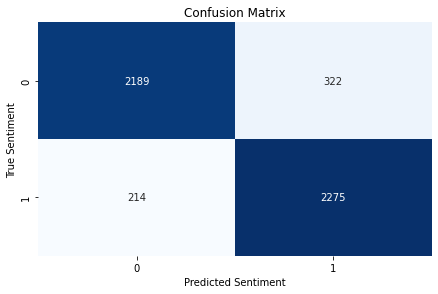

In [20]:
# Create a confusion matrix for the test set predictions.
y_names = y.drop_duplicates()
#y_names = y_names.values.tolist()

matrix = confusion_matrix(y_test, y_predict)
matrix_df = pd.DataFrame(matrix)

sns.heatmap(matrix_df, annot=True, fmt='d', cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Sentiment'),
plt.xlabel('Predicted Sentiment')
plt.show

In [21]:
#Get the precision, recall, and F1-score for the test set predictions.

print(classification_report(y_test,
                            y_predict,
                            target_names=y_names))

              precision    recall  f1-score   support

   sentiment       0.91      0.87      0.89      2511

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



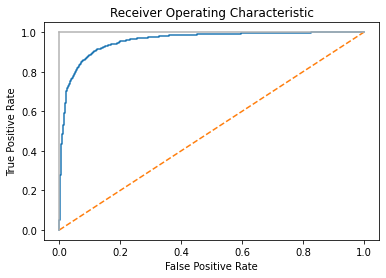

In [22]:
# Create a ROC curve for the test set.

target_probabilities = logistic_regression.predict_proba(X_test_matrix)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

The model's accuracy is: 0.85 


<function matplotlib.pyplot.show(close=None, block=None)>

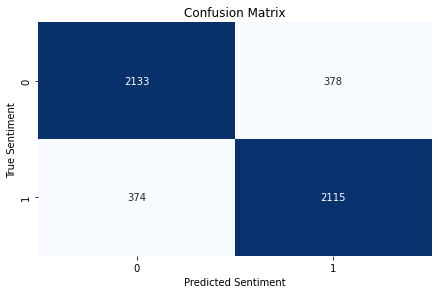

In [25]:
# Pick another classification model you learned about this week and repeat steps (5) – (9).
# going to try Random forest

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_model = randomforest.fit(X_train_matrix, y_train['sentiment'])

#Find the model accuracy on test set.

rf_y_predict = rf_model.predict(X_test_matrix)


score = accuracy_score(y_test,rf_y_predict)
print("The model's accuracy is: %.2f " % score)

# Create a confusion matrix for the test set predictions.
y_names = y.drop_duplicates()
#y_names = y_names.values.tolist()

rf_matrix = confusion_matrix(y_test, rf_y_predict)
rf_matrix_df = pd.DataFrame(rf_matrix)

sns.heatmap(rf_matrix_df, annot=True, fmt='d', cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Sentiment'),
plt.xlabel('Predicted Sentiment')
plt.show

**** interesting that the random forest was 4% less accurate than logistic regression.  